## 1.4.4 Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

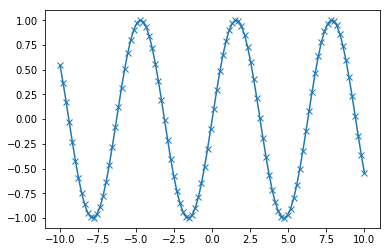

In [2]:
x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y,marker = 'x')

In [7]:
np.linspace(0,10,4
           )

array([ 0.        ,  3.33333333,  6.66666667, 10.        ])

## 1.6 이 책에서 사용하는 소프트웨어 버전
### 버전 확인
#### python 버전 : sys.version
#### 라이브러리 버전 : 라이브러리 이름.__version__

In [10]:
import sys
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sl
import matplotlib as mpl

In [11]:
# 피이썬 버전
sys.version

'3.6.4 (v3.6.4:d48eceb, Dec 19 2017, 06:54:40) [MSC v.1900 64 bit (AMD64)]'

In [12]:
# 라이브러리 이름
lib_list = [pd,np,sp,sl,mpl]
lib_name = ['Pandas','Numpy','Scipy','Scikit-learn','Matplotlib']

for name , align in zip(lib_name, lib_list):
    print('%s 의 버전 : %s' % (name, align.__version__))

Pandas 의 버전 : 0.22.0
Numpy 의 버전 : 1.14.2
Scipy 의 버전 : 1.0.0
Scikit-learn 의 버전 : 0.19.1
Matplotlib 의 버전 : 2.1.2


# 1.7 첫번째 어플리케이션 : 붓꽃의 품종 분류

## 1.7.1 데이터 적재

In [14]:
from sklearn.datasets import load_iris

In [15]:
iris_dataset = load_iris()

In [18]:
# 데이터의 key 확인하기
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [20]:
# 데이터의 설명 보기
print(iris_dataset.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [22]:
# 데이터 타입 확인

# data의 타입
type(iris_dataset.data)

# numpy 배열 형태

numpy.ndarray

In [23]:
# target 의 타입
type(iris_dataset.target)

# numpy 배열 형태

numpy.ndarray

In [25]:
# target 의 형태
iris_dataset.target.shape

(150,)

## 1.7.2 성과 측정 : training data , test data
### sklearn.model_selection.train_test_split( ) 메서드 사용

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, random_state = 0)
# random_state : 난수 생성 시 seed(초깃값) 역할

In [33]:
# 각 데이터셋의 크기 확인
print('''X_train : {0}
y_train : {1}
X_test : {2}
y_test : {3}'''.format(X_train.shape, y_test.shape,X_test.shape,y_test.shape))


X_train : (112, 4)
y_train : (38,)
X_test : (38, 4)
y_test : (38,)


## 1.7.3 가장 먼저 할 일 : 데이터셋 살펴보기
### 머신러닝 없이도 풀 수 있는 문제인가?
### 필요한 정보가 누락되었는가? 이상치가 있는가?
### 단위 확인
### 시각화 사용
#### 산점도 

In [34]:
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

AttributeError: Unknown property markder

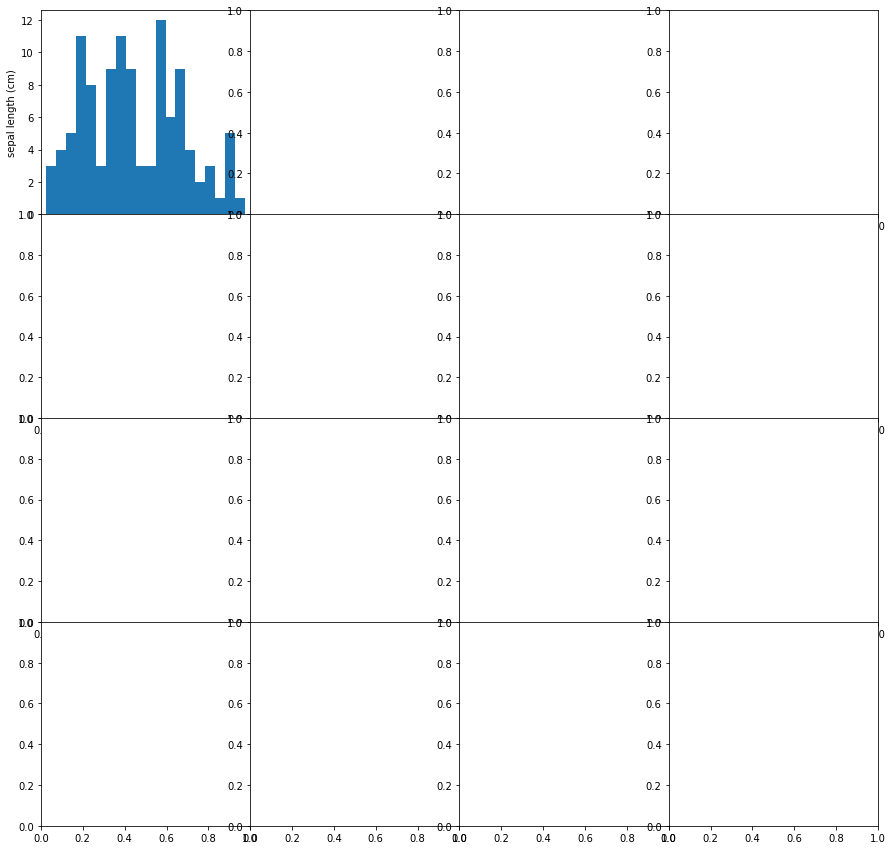

In [40]:
import mglearn
pd.plotting.scatter_matrix(iris_dataframe, figsize = (15,15), markder = 'o', 
                          hist_kwds = {'bins' : 20}, s = 60, alpha = 0.8,  cmap = mglearn.cm3)
                          

## 1.7.4 K-NN
### sklearn.neighbors.KNeighborsClassifier

### KNeighborsClassifier( n_neighbors = '고려한 이웃의 수')

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1) # 초깃값을 설정하여 인스턴스를 만든다.

In [47]:
# 훈련 데이터로 모델을 만들기 : fit 메서드 사용
knn.fit(X_train, y_train) # 훈련데이터, predictor 와 class 값을 준다.

# knn 객체를 반환하며, 기존의 객체를 변경시킨다.
# 데이터를 사용하여 맞는 parameter 의 정보가 나온다.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## 1.7.5 예측하기
### 새 데이터를 주고 predict 를 사용하여 예측

In [50]:
# 새 데이터
X_new = np.array([[5,2.9,1,0.2]])

In [52]:
knn.predict(X_new)
# 0 클래스로 분류하였다. 

array([0])

## 1.7.6 모델 평가하기
### test data 를 사용하여 평가

In [53]:
y_predict= knn.predict(X_test)

In [54]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [56]:
print('테스트 세트의 정확도 : {:.2f}'.format(np.mean(y_predict== y_test)))

테스트 세트의 정확도 : 0.97
